# Algoritmo de Deutsch

Considere o seguinte problema matemático, o chamado problema de Deutsch. Queremos determinar se uma função
$$f:\{0,1\}\rightarrow\{0,1\}$$
é constante,
$$f(0)=f(1),$$
ou balanceada,
$$f(0)\ne f(1).$$

 Veremos que
* Classicamente, precisamos calcular $f(0)$ e $f(1)$.
* Quanticamente aplica-se o circuito uma única vez.

O circuito da figura abaixo ilustra o algoritmo de Deutsch pra resolver este problema.

![](https://drive.google.com/uc?export=view&id=1LWM89B7uZlhXMyMS471epENSC50g8SJy)

- Para criar estados de máxima superposição, usaremos a porta de Hadamard
$$H=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix},$$
que atua como segue na base computacional:
\begin{align}
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|+\rangle, \\
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=|-\rangle.
\end{align}
Note que as representações são feitas na base padrão (a base computacional):
$$|0\rangle=\begin{bmatrix}1\\0\end{bmatrix},\ |1\rangle=\begin{bmatrix}0\\1\end{bmatrix}.$$
Assim
\begin{align}
|\psi_{1}\rangle &= (H\otimes H)|\psi_0\rangle = (H\otimes H)(|0\rangle\otimes|1\rangle) \\
& = H|0\rangle \otimes H|1\rangle = |+\rangle\otimes|+\rangle \\
& = \frac{1}{2}\big(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle\big).
\end{align}

Usaremos as notações
$$|\psi\rangle\otimes|\phi\rangle \equiv |\psi\rangle|\phi\rangle \equiv |\psi\phi\rangle.$$

A caixa preta, o oráculo, atua como segue:
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle.$$
Nesta expressão usamos
$$x\oplus y = (x+y)(\bmod 2).$$
Temos que
$$0\oplus 0=0,\ 0\oplus 1=1,\ 1\oplus 0=1,\ 1\oplus 1=0.$$

Algoritmos como o de Deutsch são chamados de algoritmos quânticos de consulta (quantum query algorithms), pois assumem que uma 3ª parte implementa o oráculo $U_{f}$ e os computadores clássico e quântico fazem consultas a esse oráculo. Neste contexto, a vantagem do computador quântico se deve ao menor número de consultas ao oráculo para resolver uma dado problema, em relação ao computador clássico.

Seguindo, teremos que
\begin{align}
 & |\psi_{2}\rangle= \frac{1}{2}\big(U_{f}|0\rangle|0\rangle-U_{f}|0\rangle|1\rangle+U_{f}|1\rangle|0\rangle-U_{f}|1\rangle|1\rangle\big) \\
&= \frac{1}{2}\big(|0\rangle|0\oplus f(0)\rangle-|0\rangle|1\oplus f(0)\rangle+|1\rangle|0\oplus f(1)\rangle-|1\rangle|1\oplus f(1)\rangle\big) \\
&= \frac{1}{2}\big(|0\rangle|f(0)\rangle-|0\rangle|\overline{f(0)}\rangle+|1\rangle|f(1)\rangle-|1\rangle|\overline{f(1)}\rangle\big).
\end{align}
Acima usamos a negação do bit: $\overline{0}=1,\ \overline{1}=0.$

- Função constante:
\begin{equation}
|\psi_{2}\rangle_{f(0)=f(1)} = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}
- Função balanceada:
\begin{equation}
|\psi_{2}\rangle_{f(0)\ne f(1)} = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}

- Usando interferência ($H|+\rangle=|0\rangle$ e $H|-\rangle=|1\rangle$):
\begin{equation}
|\psi_{3}\rangle_{f(0)=f(1)} =  H|+\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle+|\overline{f(0)}\rangle) = |0\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}
\begin{equation}
|\psi_{3}\rangle_{f(0)\ne f(1)} = H|-\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle+|\overline{f(0)}\rangle) = |1\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}

- Mede o 1º qubit:
\begin{cases}
0 \therefore \text{ a função é constante, } \\
1 \therefore \text{ a função é balanceada}.
\end{cases}

Vamo tentar criar intuição sobre a ideia principal do algoritmo, que é:
\begin{align}
U_{f}|x\rangle|-\rangle & = \frac{1}{\sqrt{2}}\big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\big) \\
& = |x\rangle\frac{1}{\sqrt{2}}\big(|f(x)\rangle - |\overline{f(x)}\rangle\big) \\
& = (-1)^{f(x)}|x\rangle|-\rangle.
\end{align}
É essencial que o estado inicial do 2º qubit seja $|-\rangle$, pois assim o valor da função aparece na fase correspondente do estado $|x\rangle$. É direto ver com isso que
\begin{align}
U_{f}|+\rangle|-\rangle &= \frac{1}{\sqrt{2}}\big(U_{f}|0\rangle|-\rangle+U_{f}|1\rangle|-\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big((-1)^{f(0)}|0\rangle|-\rangle+(-1)^{f(1)}|1\rangle|-\rangle\big) \\
& = \frac{(-1)^{f(0)}}{\sqrt{2}}\Big(|0\rangle+(-1)^{f(1)-f(0)}|1\rangle\Big)|-\rangle.
\end{align}

## Exemplo

Notamos da discussão acima que o oráculo efetivamente implementa a operação
$$U_f|x\rangle = (-1)^{f(x)}|x\rangle$$
para $x=0,1.$ Considerando todas as possibilidades para $f:\{0,1\}\rightarrow\{0,1\}$, pode-se verificar o seguinte
\begin{align}
& f(0)=0,\ f(1)=0\ \therefore\ U_f|0\rangle=|0\rangle,\ U_f|1\rangle=|1\rangle\ \therefore\ U_f=I,\\
& f(0)=0,\ f(1)=1\ \therefore\ U_f|0\rangle=|0\rangle,\ U_f|1\rangle=-|1\rangle\ \therefore\ U_f=Z,\\
& f(0)=1,\ f(1)=0\ \therefore\ U_f|0\rangle=-|0\rangle,\ U_f|1\rangle=|1\rangle\ \therefore\ U_f=XZX,\\
& f(0)=1,\ f(1)=1\ \therefore\ U_f|0\rangle=-|0\rangle,\ U_f|1\rangle=-|1\rangle\ \therefore\ U_f=XP(\pi)XP(\pi),
\end{align}
em que usamos a porta de fase
$$P(\phi)=\begin{bmatrix}1&0\\0&e^{i\pi}\end{bmatrix}\ \therefore\ P(\phi)|0\rangle=|0\rangle,\ P(\phi)|1\rangle=e^{i\phi}|1\rangle.$$
Também usamos
$$X=\begin{bmatrix}0&1\\1&0\end{bmatrix}\ \therefore\ X|0\rangle=|1\rangle,\ X|1\rangle=|0\rangle$$
e
$$Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}\ \therefore\ Z|0\rangle=|0\rangle,\ Z|1\rangle=-|1\rangle.$$

## Implementação no IBMQ

Usaremos o Primitive Sampler.





In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
def qc_Uf(rand_int):
  qc = QuantumCircuit(1, name='Uf')
  if rand_int == 0: # sorteia aleatoriamente o oráculo
    return qc
  elif rand_int == 1:
    qc.z(0)
  elif rand_int == 2:
    qc.x(0); qc.z(0); qc.x(0)
  elif rand_int == 3:
    qc.p(np.pi, 0); qc.x(0); qc.p(np.pi, 0); qc.x(0)
  return qc

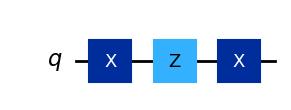

In [ ]:
from numpy.random import RandomState
prng = RandomState(1234567890)
rand_int = prng.randint(0, 4, size=1)
qc = qc_Uf(rand_int)
qc.draw('mpl')

In [ ]:
def qc_deutsch(rand_int):
  qc = QuantumCircuit(1,1)
  qc.h(0)
  qc_uf = qc_Uf(rand_int)
  qc.append(qc_uf, [0])
  qc.h(0)
  qc.measure(0,0)
  return qc

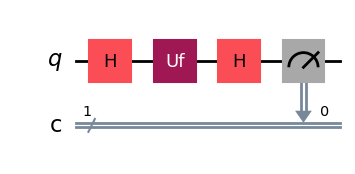

In [ ]:
from numpy.random import RandomState
prng = RandomState(1234567890)
rand_int = prng.randint(0, 4, size=1)
qc = qc_deutsch(rand_int)
qc.draw('mpl')

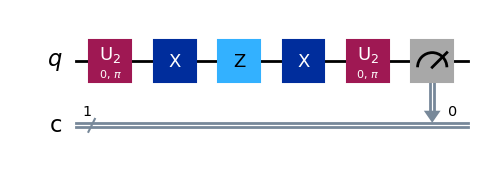

In [ ]:
qc.decompose().draw('mpl') # mostra o oráculo detalhado

### Simulação

In [ ]:
# só há simulador local agora
from qiskit_aer import AerSimulator
backend = AerSimulator()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)

In [ ]:
from numpy.random import RandomState
prng = RandomState(1234567890)
rand_int = prng.randint(0, 4, size=1)
qc = qc_deutsch(rand_int)
qc_list = []
qc_list.append(qc.decompose()) # deu erro sem o decompose
job = sampler.run(qc_list, shots = 2**12 ) # 2^12 = 4096

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'1': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
from numpy.random import RandomState
prng = RandomState(1234567890)
rand_int = prng.randint(0, 4, size=1)
qc = qc_deutsch(rand_int )
qc_list = []
qc_list.append(qc.decompose())
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csd0zh63dkhg008zhkwg


In [ ]:
job_id = "csd0zh63dkhg008zhkwg"
job = service.job(job_id)
counts_exp = job.result()[0].data.c.get_counts()
counts_exp

{'1': 4043, '0': 53}

### Gráfico

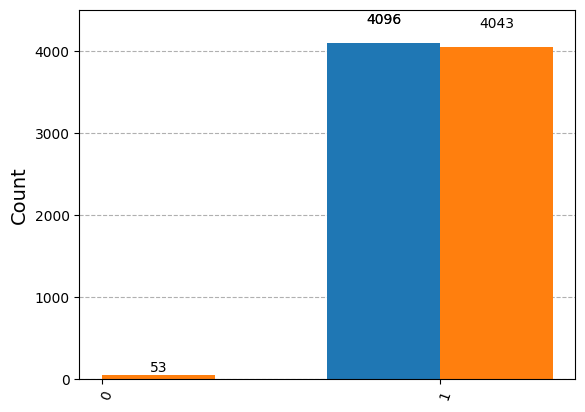

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp])

Note que no experimento, dos $2^{12} = 4096$ experimentos, erramos 53 vezes e acertamos 4043 vezes (aproximadamente 98,71% de acerto).

# Algoritmo de Deutsch no interferômetro de Mach-Zehnder

Considere o interferômetro de Mach-Zehnder (IMZ) da figura abaixo.

![](https://drive.google.com/uc?export=view&id=1AwAL0_Evi0fYutYK-AYlwTE3HKBNzP4A)


Denotaremos $|0\rangle$ como o modo espacial horizontal e $|1\rangle$ como o modo espacial vertical. A ação do divisor de feixes é a seguinte:
\begin{align}
& U_{df}|0\rangle = (|0\rangle + i|1\rangle)/\sqrt{2}, \\
& U_{df}|1\rangle = (i|0\rangle + |1\rangle)/\sqrt{2}.
\end{align}
A ação do espelho é tal que
\begin{align}
& U_e|0\rangle = i|1\rangle, \\
& U_e|1\rangle = i|0\rangle.
\end{align}
A fase multiplica $e^{i\phi}$ pelo estado correspondente.

Tendo feito essas definições, podemos acompanhar a evolução de estados no IMZ:
\begin{align}
& |0\rangle \xrightarrow{DF_1} \big(|0\rangle + i|1\rangle\big)/\sqrt{2} \\
& \xrightarrow{E_1,E_2} \big(i|1\rangle + i^2|0\rangle\big)/\sqrt{2} = \big(-|0\rangle + i|1\rangle\big)/\sqrt{2} \\
& \xrightarrow{\phi_1,\phi_2} \big(-e^{i\phi_0}|0\rangle + ie^{i\phi_1}|1\rangle\big)/\sqrt{2} \\
& \xrightarrow{DF_2} \big(-e^{i\phi_0}\big(|0\rangle + i|1\rangle\big) + ie^{i\phi_1}\big(|1\rangle+i|0\rangle\big)\big)/2 = \big(-\big(e^{i\phi_0}+e^{i\phi_1}\big)|0\rangle - i\big(e^{i\phi_0}-e^{i\phi_1}\big)|1\rangle\big)/2.
\end{align}

A probabilidade do detector $D_0$ clicar é
\begin{align}
Pr(0) & = \big|-\big(e^{i\phi_0}+e^{i\phi_1}\big)/2\big|^2 \\
& = \big(e^{i\phi_0}+e^{i\phi_1}\big)\big(e^{-i\phi_0}+e^{-i\phi_1}\big)/4 \\
& = \big(1 + e^{i(\phi_0-\phi_1)} + e^{-i(\phi_0-\phi_1)} + 1\big)/4 \\
& = \big(1 + \cos(\phi_0-\phi_1)\big)/2.
\end{align}

Agora consideremos o seguinte problema de promessa de Deutsch. Alguém que possui controle sobre as fases $\phi_0,\ \phi_1$ nos promete que colocará
\begin{align}
& \phi_0 = 0,\ \phi_1=0,\\
& \phi_0 = 0,\ \phi_1=\pi,\\
& \phi_0 = \pi,\ \phi_1=0,\\
& \phi_0 = \pi,\ \phi_1=\pi.
\end{align}
Não precisamos descobrir o valor da fase, mas sim se elas são iguais (que é o análogo da função constante) ou diferentes (que é o análogo da função balanceada). Assim como no algoritmo de Deutsch, teremos aqui que
\begin{align}
& Pr(0)_{\phi_0=\phi_1} = 1, \\
& Pr(0)_{\phi_0\ne\phi_1} = 0.
\end{align}
Então, se o fóton chegou no detector $D_0$, concluiremos que a função é constante, ou seja, que as fases são iguais. Senão, concluiremos que a função é balanceada, ou seja, que as fases diferem de um valor igual a $\pi$.

A simulação desse experimento pode ser vista em https://lab.quantumflytrap.com/lab/deutsch-jozsa.

## Referências

1. D. Deutsch, “Quantum theory, the Church-Turing principle and the universal quantum computer,” Proceedings of the Royal Society of London. A. Mathematical and Physical Sciences, vol. 400, no. 1818, pp. 97-117, Jan. 1997, doi: 10.1098/rspa.1985.0070.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.

1. G. E. M. Cabral, A. F. de Lima, and B. Lula Jr., “Interpretando o algoritmo de Deutsch no interferômetro de Mach-Zehnder,” Rev. Bras. Ensino Fís., vol. 26, pp. 109-116, 2004, doi: 10.1590/S0102-47442004000200005.

1. P. Migdał, K. Jankiewicz, P. Grabarz, C. Decaroli, and P. Cochin, “Visualizing quantum mechanics in an interactive simulation - Virtual Lab by Quantum Flytrap,” OE, vol. 61, no. 8, p. 081808, Jun. 2022, doi: 10.1117/1.OE.61.8.081808.


